In [2]:
import pandas as pd

# Path to the JSON file
json_file_path = r"cleaned_files.json"

# Read the JSON file into a DataFrame
df = pd.read_json(json_file_path, orient='records')




In [3]:
df

,file_name,content,technical_specification
0,file10.pdf,fundus fluorescein angiography indocyanine ang...,fundus fluorescein angiography indocyanine ang...
1,file100.pdf,auto transfusion machine cell saver cardiothor...,auto transfusion machine cell saver auto trans...
2,file1000.pdf,hkkjrh qfozkku lalfkku iqj nrrhlx medical cien...,electrophysiology equipment electrophysiology ...
3,file1001.pdf,uro hkkjrh qfozkku lalfkku iqj nrrhlx medical ...,uro surgical microscope distance better head d...
4,file1002.pdf,ent hkkjrh qfozkku lalfkku iqj nrrhlx medical ...,ent ent navigation system description system s...
...,...,...,...
755,file992.pdf,ech hkkjrh qfozkku lalfkku iqj nrrhlx medical ...,ech echo usg machine ultra high resolution ima...
756,file993.pdf,obgy hkkjrh qfozkku lalfkku iqj nrrhlx medical...,obgy automated sperm analyser automated system...
757,file995.pdf,sur gastro laproscopic sur hkkjrh qfozkku lalf...,sur gastro laproscopic sur laparoscopic surger...
758,file997.pdf,phy pmr hkkjrh qfozkku lalfkku iqj nrrhlx medi...,electro physiology system system hardware cons...


Top words by TF-IDF score for Word Cloud for Technical Specification (TF-IDF):
: 656.2234837233136
system: 14.557396825978502
enquiry: 7.187054884459726
image: 6.656463221236639
equipment: 6.017192049085793
software: 5.776958319988882
warranty: 5.054777549871181
mode: 4.780332872578507
probe: 4.764730877963165
patient: 4.685285773354185
data: 4.632685128661245
facility: 4.547256974398014
display: 4.456893025775831
monitor: 4.427721676909193
instrument: 4.344103793184845


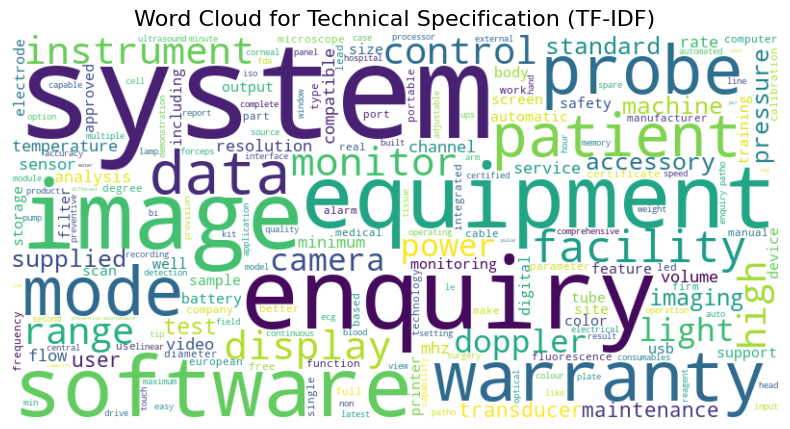

Top words by TF-IDF score for Word Cloud for Content (TF-IDF):
: 753.2667226054265
certificate: 4.9276410546637255
document: 4.668215394824819
firm: 4.577907457353809
case: 4.4299120960518525
duty: 4.220423326202354
rate: 4.178048776635824
equipment: 4.0847822563745595
tax: 3.749938166920159
order: 3.7433056785688463
payment: 3.717277009678897
warranty: 3.5435760247001986
system: 3.3911189293268595
bank: 3.320675153838229
guarantee: 3.118373177860838


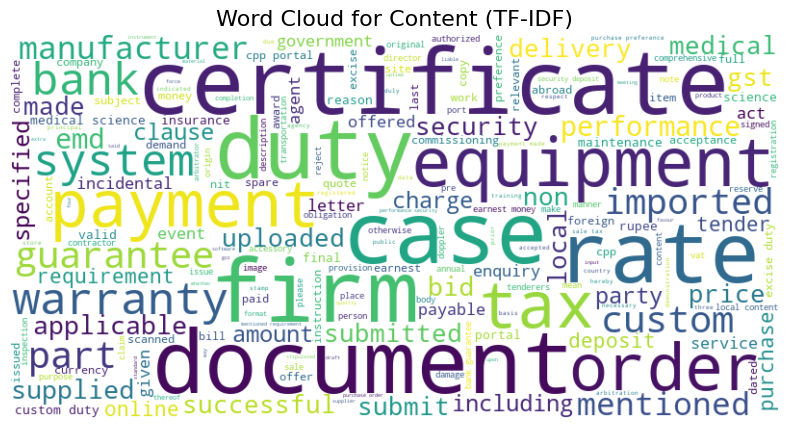

In [4]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def generate_wordcloud_from_tfidf(text_data, title):
    # Create the TF-IDF vectorizer
    vectorizer = TfidfVectorizer(ngram_range=(0, 2))
    tfidf_matrix = vectorizer.fit_transform(text_data)
  
    # Get the words and their corresponding TF-IDF scores
    feature_array = vectorizer.get_feature_names_out()
    tfidf_sorting = tfidf_matrix.sum(axis=0).A1
    word_tfidf = dict(zip(feature_array, tfidf_sorting))
  # Print TF-IDF scores
    sorted_items = sorted(word_tfidf.items(), key=lambda x: x[1], reverse=True)
    print(f"Top words by TF-IDF score for {title}:")
    for word, score in sorted_items[:15]:  # Display top 20 words
        print(f"{word}: {score}")
    # Generate the word cloud using TF-IDF scores
    wordcloud = WordCloud(width=800, height=400, background_color='white',random_state=42).generate_from_frequencies(word_tfidf)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide axes
    plt.title(title, fontsize=16)
    plt.show()

# Generate word clouds for both columns using TF-IDF
generate_wordcloud_from_tfidf(df['technical_specification'], 'Word Cloud for Technical Specification (TF-IDF)')
generate_wordcloud_from_tfidf(df['content'], 'Word Cloud for Content (TF-IDF)')

In [5]:
import pandas as pd
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

# Combine default stop words and custom stop words into a list (not a set)
all_stop_words = list(set(stopwords.words('english')))

def apply_nmf_and_display_topics(column_name, num_topics=9, num_top_words=8):
    # Step 1: Vectorize the specified column with custom stop words
    vectorizer = TfidfVectorizer(stop_words=all_stop_words)
    X = vectorizer.fit_transform(df[column_name].fillna(''))  # Vectorize the text

    # Step 2: Apply NMF
    nmf_model = NMF(n_components=num_topics, random_state=42, beta_loss='frobenius')
    W = nmf_model.fit_transform(X)  # Document-topic matrix
    H = nmf_model.components_       # Topic-term matrix

    # Step 3: Display Topics
    feature_names = vectorizer.get_feature_names_out()  # Get feature names (words)
    for topic_idx, topic in enumerate(H):
        print(f"\nTopic {topic_idx + 1} for {column_name}:")
        top_indices = topic.argsort()[:-num_top_words - 1:-1]  # Indices of top words for this topic
        top_words = [feature_names[i] for i in top_indices]  # Retrieve words corresponding to those indices
        print(", ".join(top_words))

# Step 4: Apply to 'Technical Specification_cleaned' column
apply_nmf_and_display_topics('technical_specification')

# Step 5: Apply to 'content_cleaned' column
apply_nmf_and_display_topics('content')



Topic 1 for technical_specification:
video, image, camera, light, system, definition, output, high

Topic 2 for technical_specification:
doppler, transducer, imaging, system, mhz, image, mode, probe

Topic 3 for technical_specification:
equipment, site, maintenance, warranty, modification, preventive, hospital, basis

Topic 4 for technical_specification:
monitor, monitoring, pressure, ecg, alarm, patient, display, parameter

Topic 5 for technical_specification:
system, sample, pcr, test, temperature, plate, analysis, instrument

Topic 6 for technical_specification:
microscope, fluorescence, stage, camera, filter, objective, plan, light

Topic 7 for technical_specification:
system, navigation, probe, instrument, registration, surgery, software, image

Topic 8 for technical_specification:
enquiry, patho, optho, common, surgery, micro, library, radiology

Topic 9 for technical_specification:
forceps, diameter, telescope, sheath, jaw, tip, straight, bipolar

Topic 1 for content:
duty, tax